Predicted Disease: migraine
Drug Name: Imitrex


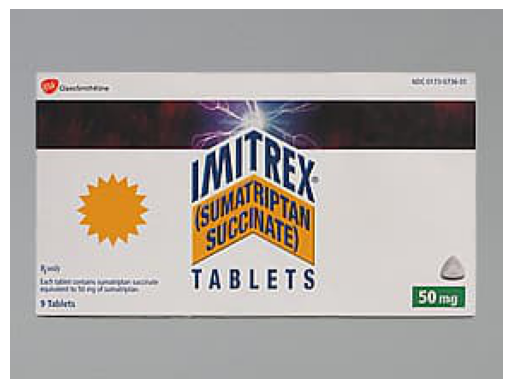

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
data = {
    'symptoms': ['fever, cough', 'ab','chest pain', 'runny nose, sore throat','headache, nausea','polyuria, polydypsia, shortness  of breath, pain  chest, asthenia, nausea, orthopnea, rale, sweat, sweating  increased, unresponsiveness, mental  status changes, vertigo, vomiting, labored breathing'
],

    'disease': ['flu','cd', 'heart attack', 'common cold','migraine','diabetes'
]

}
df = pd.DataFrame(data)
X = df['symptoms']
y = df['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
user_input = ['headache, nausea']

predicted_disease = model.predict(user_input)[0]
print(f'Predicted Disease: {predicted_disease}')
drugs = {
    'flu': {'name': 'Tamiflu', 'image_url': 'https://upload.wikimedia.org/wikipedia/commons/9/98/Tamiflu.JPG'},
    'migraine': {'name': 'Imitrex', 'image_url': 'https://img.medscapestatic.com/pi/features/drugdirectory/octupdate/GSK07360.jpg'},
    'heart attack': {'name': 'Aspirin', 'image_url': 'https://media.gettyimages.com/id/672838265/photo/1990s-female-hand-taking-two-aspirin-tablets-from-bottle.jpg?s=612x612&w=0&k=20&c=ULmXGnq2wIgn8yIRmp3lEIs7h-RkP_XT5S8zKY3dGMo='},  # Known good URL
    'common cold': {'name': 'DayQuil', 'image_url': 'https://th.bing.com/th/id/OIP.lcKPQjHLwJdF_36Xu_lNrQHaHa?rs=1&pid=ImgDetMain'},
    'diabetes': {'name': 'Insulin', 'image_url': 'https://upload.wikimedia.org/wikipedia/commons/9/93/Inzul%C3%ADn.jpg'}
}

def fetch_image(url):
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image: {e}")
        return None

def show_image(url):
    image = fetch_image(url)
    if image:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        print("Failed to load image.")
drug_info = drugs.get(predicted_disease, {'name': 'Unknown', 'image_url': ''})
print(f'Drug Name: {drug_info["name"]}')
if drug_info['image_url']:
    show_image(drug_info['image_url'])